In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/home/manish/Sem II/AI and Ethics/Term Assignment/Fair-regression/data/raw/COMPAS/compas-scores-two-years-violent.csv')
idx = (df['days_b_screening_arrest'] <= 30) & (df['days_b_screening_arrest'] >= -30) & (df['c_charge_degree'] != "O") & (df['v_score_text'] != 'N/A')
df = df[idx]
i = (df['race'] == 'African-American') | (df['race'] == 'Caucasian')
df = df[i]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3377 entries, 1 to 4742
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       3377 non-null   int64  
 1   name                     3377 non-null   object 
 2   first                    3377 non-null   object 
 3   last                     3377 non-null   object 
 4   compas_screening_date    3377 non-null   object 
 5   sex                      3377 non-null   object 
 6   dob                      3377 non-null   object 
 7   age                      3377 non-null   int64  
 8   age_cat                  3377 non-null   object 
 9   race                     3377 non-null   object 
 10  juv_fel_count            3377 non-null   int64  
 11  juv_misd_count           3377 non-null   int64  
 12  juv_other_count          3377 non-null   int64  
 13  priors_count             3377 non-null   int64  
 14  days_b_screening_arrest 

In [3]:
df.isnull().values.any()

True

In [4]:
df = df[['race', 'age', 'sex', 'priors_count', 'v_decile_score', 'v_score_text', 'is_violent_recid']]
df = df.dropna()
df.head()

,race,age,sex,priors_count,v_decile_score,v_score_text,is_violent_recid
1,African-American,34,Male,0,1,Low,1
6,Caucasian,39,Female,0,1,Low,0
8,Caucasian,27,Male,0,4,Low,0
9,Caucasian,37,Female,0,1,Low,0
10,African-American,41,Male,0,2,Low,0


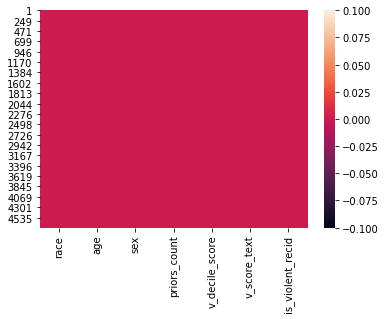

In [5]:
sns.heatmap(df.isnull())

In [6]:
race = pd.get_dummies(df['race'])
sex = pd.get_dummies(df['sex'])
v_decile_score = pd.get_dummies(df['v_decile_score'], prefix="score")
v_score_text = pd.get_dummies(df['v_score_text'])

In [7]:
df.drop(['race', 'sex','v_decile_score', 'v_score_text'], axis=1, inplace=True)

In [8]:
df = pd.concat([df, race, sex, v_decile_score, v_score_text], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3377 entries, 1 to 4742
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               3377 non-null   int64
 1   priors_count      3377 non-null   int64
 2   is_violent_recid  3377 non-null   int64
 3   African-American  3377 non-null   uint8
 4   Caucasian         3377 non-null   uint8
 5   Female            3377 non-null   uint8
 6   Male              3377 non-null   uint8
 7   score_1           3377 non-null   uint8
 8   score_2           3377 non-null   uint8
 9   score_3           3377 non-null   uint8
 10  score_4           3377 non-null   uint8
 11  score_5           3377 non-null   uint8
 12  score_6           3377 non-null   uint8
 13  score_7           3377 non-null   uint8
 14  score_8           3377 non-null   uint8
 15  score_9           3377 non-null   uint8
 16  score_10          3377 non-null   uint8
 17  High              3377 non-null  

In [10]:
df.head()

,age,priors_count,is_violent_recid,African-American,Caucasian,Female,Male,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,High,Low,Medium
1,34,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
6,39,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8,27,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
9,37,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
10,41,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [11]:
df.isnull().values.any()

False

In [16]:
df['age'].unique()

array([34, 39, 27, 37, 41, 25, 31, 21, 43, 33, 55, 29, 51, 35, 49, 53, 56,
       40, 22, 26, 32, 30, 20, 54, 19, 52, 42, 24, 48, 62, 28, 66, 45, 23,
       50, 44, 38, 70, 46, 58, 36, 47, 69, 60, 61, 63, 59, 65, 68, 71, 57,
       75, 64, 72, 67, 74, 73, 80, 77, 79, 18])